# AI Agents: Building Multi-Agent System (Part-8)

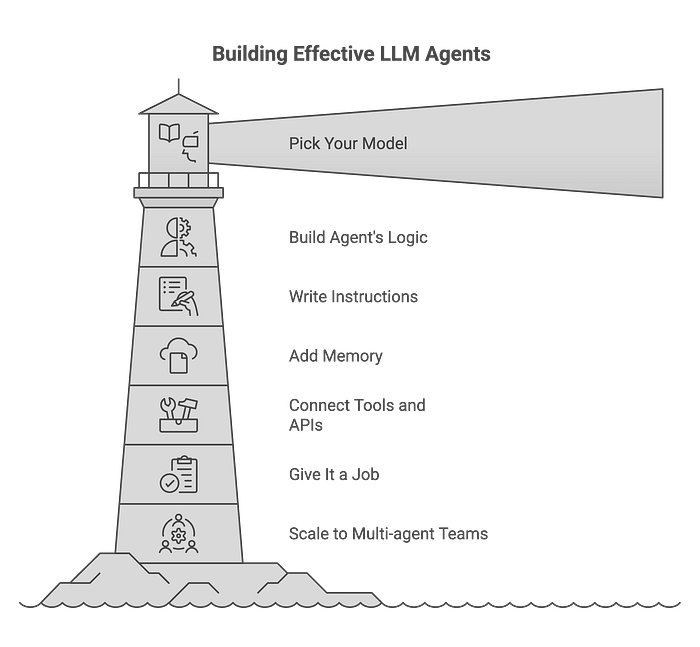

# Table of Contents
1. Introduction
2. Agent Design Components
- 2.1 Selecting the Model
- 2.2 Defining Tools
- 2.3 Configuring Instructions
3. Orchestration
4. Implementation: Supervisor Pattern
- 4.1 Message History Management
- 4.2 Multi-level Hierarchies
- 4.3 Customizing handoff tools
- 4.4 Message Forwarding
5. Implementation: Swarm Pattern
6. Running the Agents
- 6.1 Invoking Modes
- 6.2 Input Format
- 6.3 Output Format
- 6.4 Streaming Output
- 6.5 Max Iterations
7. The Hidden Barriers
8. Breaking Through Barriers
9. Roadmap For Building Scalable AI Agents
10. Conclusion

# 1. Introduction

Tác nhân AI có giá trị khi đưa vào các quy trình làm việc mà trước đây không thể tự động hóa, đặc biệt nơi mà các phương pháp truyền thống gặp sự cản trợ:
- Complex decision-making: Ra quyết định phức tạp. Quy trình làm việc liên quan đến phán đoán sắc thái, ngoại lệ hoặc quyết định nhạy cảm với ngữ cảnh: Ví dụ phê duyệt hoàn tiền trong quy trình làm việc dịch vụ khách hàng
- Difficult-to-maintain rules: Quy tắc khó duy trì. Khi hệ thống trở nên cồng kềnh do có nhiều bộ quy tắc phức tạp khiến việc cập nhật tốn kém hoặc dễ xảy ra lỗi.
- Heavy reliance on unstructured data: Phụ thuộc vào nhiều loại dữ liệu phi cấu trúc. Các tình huống liên quan đến việc diễn giải ngôn ngữ tự nhiên, trích xuất ý nghĩa từ tài liệu hoặc tương tác với người dùng theo cách trò chuyện.

Trước khi quyết định xây dựng một tác nhân, hãy xác minh xem trường hợp của bạn có thể đáp ứng rõ ràng các tiêu chí này không. Nếu không, một giải pháp xác định rõ ràng là đủ.

# 2. Agent Design Components

Ở dạng cốt lõi nhất, một tác nhân bao gồm 3 thành phần cốt lõi nhất:
- Model: Mô hình LLM cung cấp power cho quá trình suy nghĩ và ra quyết định của tác nhân
- Tools: Các hàm gọi API bên ngoài mà tác nhân có thể sử dụng để thực hiện hành động
- Instructions: Các hướng dẫn và quy định rõ ràng về cách thức hoạt động của tác nhân

## 2.1 Selecting the Model
- Không phải tác vụ nào cũng cần mô hình thông minh nhất
- Thử thay thế bằng các mô hình nhỏ hơn xem có đạt được kết quả mong đợi không

Có ba nguyên tắc khi lựa chọn mô hình:
- Thiết lập các đánh giá để thiết lập đường cơ sở hiệu suất
- Tập trung vào mục tiêu đạt được độ chính xác với các mô hình tốt nhất hiện có
- Tối ưu chi phí và độ trễ bằng cách thay thế các mô hình nhỏ hơn

https://gorilla.cs.berkeley.edu/leaderboard.html

## 2.2 Defining Tools
- Gọi hàm là cách chính để cho phép LLM tương tác với công cụ
- "Hàm" và "công cụ" thường thay thế cho nhau
- "Hàm" là các khối mã có thể tận dụng lại
- "Hàm" là "công cụ" mà tác nhân sử dụng để thực hiện các nhiệm vụ

Nói chung, tác nhân cần có 3 loại công cụ:

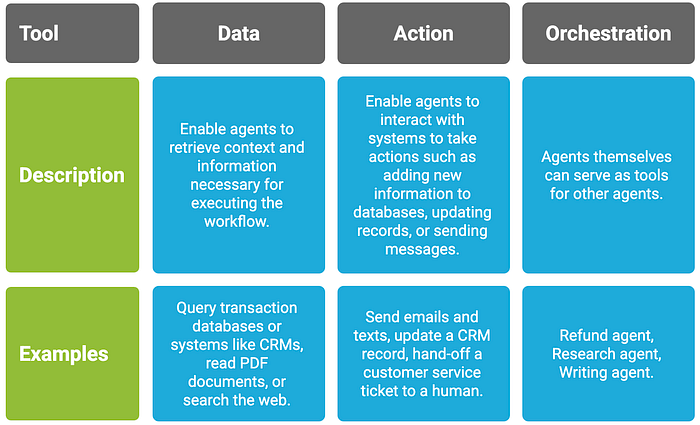

Ví dụ: đây là cách bạn sẽ trang bị cho tác nhân được xác định ở trên một loạt công cụ khi sử dụng SDK tác nhân:


In [ ]:
from agents import Agent, WebSearchTool, function_tool
import datetime
from agents import db

@function_tool
def save_results(output):
    db.insert({"output": output, "timestamp": datetime.time()})
    return "File saved"


search_agent = Agent(
    name="Search agent",
    instructions="Help the user search the internet and save results if asked.",
    tools=[WebSearchTool(), save_results],
)

Khi số lượng công cụ cần thiết tăng lên, hãy cân nhắc chia nhỏ nhiệm vụ cho nhiều tác nhân.

## 2.3 Configuring Instructions
Một hướng dẫn rõ ràng thì cần thiết cho một ứng dụng sử dụng LLM, đặc biệt đối với agent.
Một hướng dẫn rõ ràng giúp giảm sự mơ hồ và cải thiện khả năng quyết định, giúp quy trình làm việc trở nên mượt mà và ít lỗi hơn.

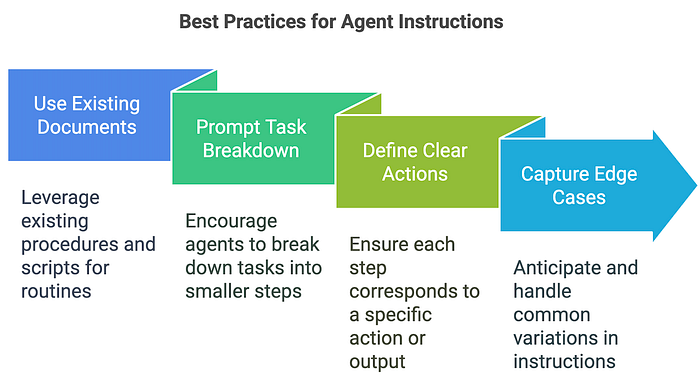

Cũng có thể sử dụng các mô hình cao cấp để tự động tạo hướng dẫn từ các tài liệu hiện có. dưới đây là một ví dụ cho phương pháp này:

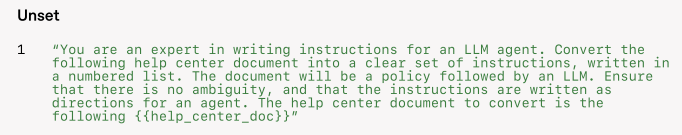

# 3. Orchestration

- Hệ thống đa tác nhân có thể biểu diễn dưới dạng đồ thị, các tác nhân được đại diện với các nút
- Trong mô hình quản lý/giám sát, các cạnh đại diện cho lệnh gọi công cụ
- Trong mô hình phân tán và bầy đàn, các cạnh đại diện cho các giao dịch chuyển giao thực thi giữa các tác nhân

Bất kể mô hình phối hợp nào, các nguyên tắc cần được áp dụng:
- giữ cho các thành phần linh hoạt
- có thể cấu thành và điều khiển được bằng các lời nhắc rõ ràng
- có cấu trúc tốt

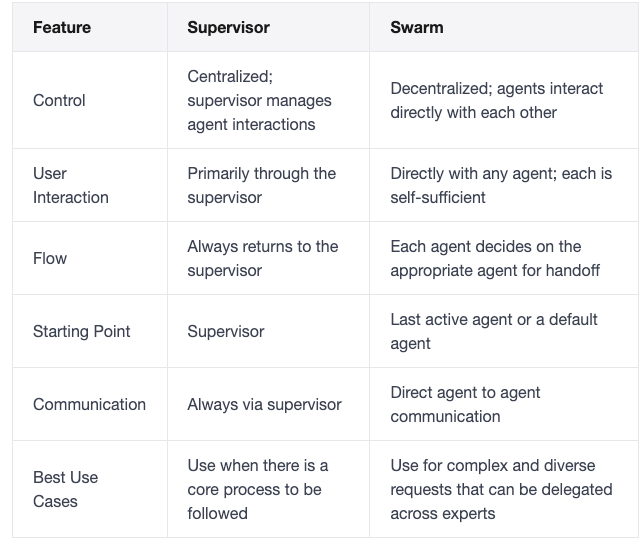

Trong các mô hình phi tập trung, các tác nhân có thể "bàn giao" việc thực thi quy trình công việc cho nhau. Bàn giao là một hình thức chuyển giao một chiều cho phép một tác nhân ủy quyền cho một tác nhân khác.

# 4. Implementation: Supervisor Pattern

- Tạo một tác nhân giám sát để điều phối các tác nhân chuyên biệt

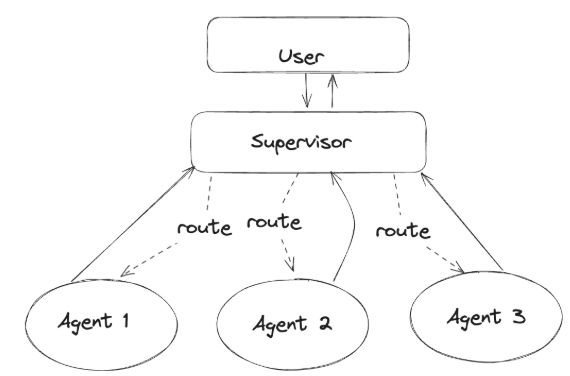

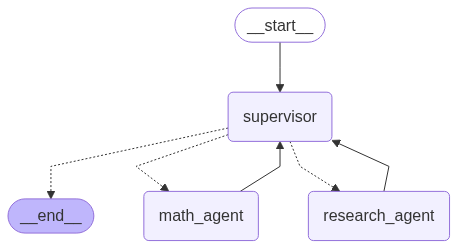

In [4]:
import os
from dotenv import load_dotenv

load_dotenv()

from langchain_openai import ChatOpenAI
from langgraph.graph import START, END
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import create_react_agent
from langgraph_supervisor import create_supervisor
from IPython.display import Image, display

# Select LLM
model = ChatOpenAI(model="gpt-4o")

# Define tools
def add(a: float, b: float) -> float:
    """Add two numbers."""
    return a + b

def multiply(a: float, b: float):
    """Multiply two numbers."""
    return a * b


def divide(a: float, b: float):
    """Divide two numbers."""
    return a / b

web_search = TavilySearchResults(max_results=3)

# Create Worker Agents
research_agent = create_react_agent(
    model=model,
    tools=[web_search],
    name="research_agent",
    prompt=(
        "You are a research agent.\n\n"
        "INSTRUCTIONS:\n"
        "- Assist ONLY with research-related tasks, DO NOT do any math\n"
        "- After you're done with your tasks, respond to the supervisor directly\n"
        "- Respond ONLY with the results of your work, do NOT include ANY other text."
    )
)

math_agent = create_react_agent(
    model=model,
    tools=[add, multiply, divide],
    name="math_agent",
    prompt=(
        "You are a math agent.\n\n"
        "INSTRUCTIONS:\n"
        "- Assist ONLY with math-related tasks\n"
        "- After you're done with your tasks, respond to the supervisor directly\n"
        "- Respond ONLY with the results of your work, do NOT include ANY other text."
    )
)

# Create Supervisor Agent
supervisor_agent = create_supervisor(
    model=model,
    agents=[research_agent, math_agent],
    prompt=(
        "You are a supervisor managing two agents:\n"
        "- a research agent. Assign research-related tasks to this agent\n"
        "- a math agent. Assign math-related tasks to this agent\n"
        "Assign work to one agent at a time, do not call agents in parallel.\n"
        "Do not do any work yourself."
    ),
    add_handoff_black_messages=True,
    output_mode="full_history",
).compile()

display(Image(supervisor_agent.get_graph().draw_mermaid_png()))

sử dụng pretty_print_mesages để hiển thị đầu ra tác nhân một cách đẹp hơn

In [5]:
from langchain_core.messages import convert_to_messages

def pretty_print_messages(message, ident=False):
    pretty_message = message.pretty_repr(html=True)
    if not ident:
        print(pretty_message)
        return 
    
    indented = "\n".join("\t" + c for c in pretty_message.split("\n"))
    print(indented)

def pretty_print_messages(update, last_message=False):
    is_subgraph = False
    if isinstance(update, tuple):
        ns, update = update
        # Skip parent graph updates in the printouts
        if len(ns) == 0:
            return
        graph_id = ns[-1].split(":")[0]
        print(f"Update from subgraph {graph_id}:")
        print("\n")
        is_subgraph = True
    for node_name, node_update in update.items():
        update_label = f"Update from node {node_name}:"
        if is_subgraph:
            update_label = "\t" + update_label
        print(update_label)
        print("\n")

        messages = convert_to_messages(node_update["messages"])
        if last_message:
            messages = messages[-1:]
        
        for m in messages:
            pretty_print_messages(m, indent=is_subgraph)
        print("\n")

In [ ]:
# To test the flow:
def test_supervisor_functionality():
    """Test the supervisor pattern with a specific GDP query to validate handoffs."""
    
    print(f"Query: find US and New York state GDP in 2024. what % of US GDP was New York state?")
    print("-" * 80)
    
    try:
        for chunk in supervisor_agent.stream(
            {
                "messages": [
                    {
                        "role": "user",
                        "content": "find US and New York state GDP in 2024. what % of US GDP was New York state?",
                    }
                ]
            },
            subgraphs=False
        ):
            pretty_print_messages(chunk, last_message=True)
        
        print(f"Test completed successfully")
        
    except Exception as e:
        print(f"Test failed with error: {str(e)}")
    
    print("=" * 80)

# Run
if __name__ == "__main__" or True:
    test_supervisor_functionality()

## 4.1 Message History Management
Cũng có thể kiểm soát toàn bộ tin nhắn của tác nhân được thêm vào lịch sử trò chuyện tổng thể của hệ thống đa tác nhân. Bao gồm toàn bộ lịch sử tin nhắn của một tác nhân:

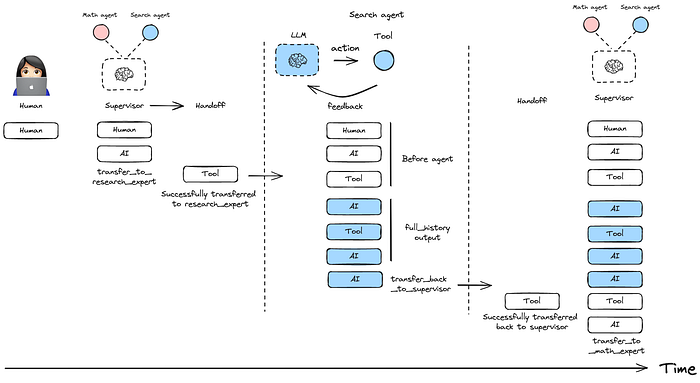

In [ ]:
agent1 = ""
agent2 = ""
supervisor = create_supervisor(
    agents=[agent1, agent2],
    output_mode="full_history",
)

Chỉ bao gồm phản hồi cuối cùng của tác nhân:

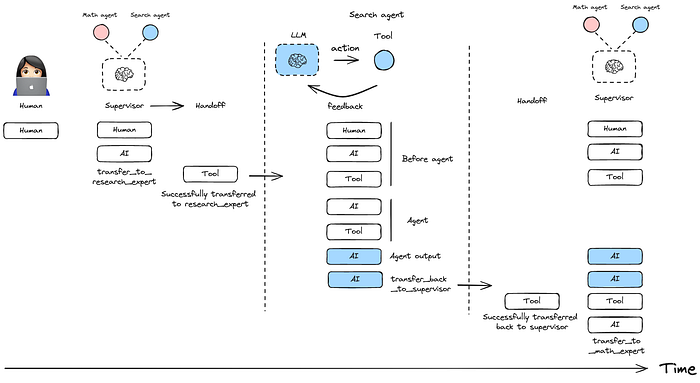

In [ ]:
supervisor = create_supervisor(
    agents=[agent1, agent2],
    output_mode="last_message"
)

## 4.2 Multi-level Hierarchies
Tạo một hệ thống phân cấp đa cấp bằng cách tạo một người giám sát quản lý nhiều tác nhân giám sát khác


In [ ]:
writing_agent = ""
publishing_agent = ""

research_team = create_supervisor(
    [research_agent, math_agent],
    model=model,
    supervisor_name="research_supervisor"
).compile(name="research_team")

writing_team = create_supervisor(
    [writing_agent, publishing_agent],
    model=model,
    supervisor_name="writing_supervisor"
).compile(name="writing_team")

top_level_supervisor = create_supervisor(
    [research_team, writing_team],
    model=model,
    supervisor_name="top_level_supervisor"
).compile(name="top_level_supervisor")

## 4.3 Customizing handoff tools
- Supervisor sử dụng các công cụ bàn giao được tạo sẵn bằng `create_handoff_tool`
- Chúng ta cũnh có thể tự tạo các công cụ bàn giao tùy chỉnh
Dưới đây là một số ý tưởng về cách mà có thể sửa đổi cài đặt mặc định:
- thay đổi tên công cụ hoặc mô tả
- thêm các đối số gọi công cụ để LLM điền vào. ví dụ như mô tả tác vụ cho tác nhân tiếp theo
- thay đổi dữ liệu được truyền cho tác nhân như một phần của quá trình chuyển giao
- Theo mặc định: `create_handoff_tool` truyền toàn bộ lịch sử tin nhắn cũng như tin nhắn công cụ cho biết quá trình chuyển giao thành công

Sau đây là một ví dụ về cách chuyển các công cụ chuyển giao tùy chỉnh cho create_supervisor:

In [ ]:
from langgraph_supervisor import create_handoff_tool

workflow = create_supervisor(
    [research_agent, math_agent],
    tools=[
        create_handoff_tool(agent_name="math_expert", name="assign_to_math_expert", description="Assign task to math expert"),
        create_handoff_tool(agent_name="research_expert", name="assign_to_research_expert", description="Assign task to research expert")
    ],
    model=model,
)

- cũng có thể kiểm soát việc thêm thông báo gọi công cụ chuyển giao vào trạng thái hay không
- mặc định, chúng sẽ được thêm vào (add_handoff_messages=True), nhưng bạn có thể tắt tùy chọn này nếu muốn lịch sử ngắn gọn hơn:

In [ ]:
workflow = create_supervisor(
    [research_agent, math_agent],
    model=model,
    add_handoff_messages=False
)

Ngoài ra, bạn có thể tùy chỉnh tiền tố được sử dụng cho các công cụ chuyển giao được tạo tự động

In [ ]:
workflow = create_supervisor(
    [research_agent, math_agent],
    model=model,
    handoff_tool_prefix="delegate_to"
)
# This will create tools named: delegate_to_research_expert, delegate_to_math_expert

Sau đây là ví dụ về hình thức của công cụ chuyển giao tùy chỉnh:

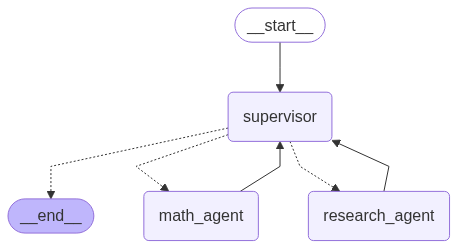

In [9]:
from typing import Annotated
from langchain_core.tools import tool, InjectedToolCallId
from langgraph.prebuilt import InjectedState
from langgraph.graph import StateGraph, START, MessagesState, END
from langgraph.types import Command
from IPython.display import display, Image

def create_handoff_tool(*, agent_name: str, description: str | None=None):
    name = f"transfer_to_{agent_name}"
    description = description or f"Ask {agent_name} for help."

    @tool(name, description=description)
    def handoff_tool(
        state: Annotated[MessagesState, InjectedState],
        tool_call_id: Annotated[str, InjectedToolCallId],
    ) -> Command:
        tool_message = {
            "role": "tool",
            "content": F"Successfully transferred to {agent_name}",
            "name": name,
            "tool_call_id": tool_call_id,
        }
        return Command(
            goto=agent_name,
            update={**state, "messages": state["messages"] + [tool_message]}
        )
    return handoff_tool

# Handoffs
assign_to_research_agent = create_handoff_tool(
    agent_name="research_agent",
    description="Assign task to a researcher agent.",
)

assign_to_math_agent = create_handoff_tool(
    agent_name="math_agent",
    description="Assign task to a math agent.",
)

supervisor_agent = create_react_agent(
    model="openai:gpt-4o-mini",
    tools=[assign_to_research_agent, assign_to_math_agent],
    prompt=(
        "You are a supervisor managing two agents:\n"
        "- a research agent. Assign research-related tasks to this agent\n"
        "- a math agent. Assign math-related tasks to this agent\n"
        "Assign work to one agent at a time, do not call agents in parallel.\n"
        "Do not do any work yourself."
    ),
    name="supervisor",
)

# Define the mu;ti-agent supervisor graph
supervisor = (
    StateGraph(MessagesState)
    # NOTE: `destinations` is only needed for visualization and doesn't affect runtime behavior
    .add_node(supervisor_agent, destinations=("research_agent", "math_agent", END))
    .add_node(research_agent)
    .add_node(math_agent)
    .add_edge(START, "supervisor")
    # always return back to the supervisor
    .add_edge("research_agent", "supervisor")
    .add_edge("math_agent", "supervisor")
    .compile()
)

display(Image(supervisor.get_graph().draw_mermaid_png()))

Output:

In [ ]:
for chunk in supervisor.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "find US and New York state GDP in 2024. what % of US GDP was New York state?",
            }
        ]
    },
):
    pretty_print_messages(chunk, last_message=True)

final_message_history = chunk["supervisor"]["messages"]
# Update from node supervisor:

for message in final_message_history:
    message.pretty_print()

## 4.4 Message Forwarding
Có thể trang bị cho supervisor một công cụ để chuyển tiếp trực tiếp tin nhắn cuối cùng nhận được từ tác nhân cấp thấp đến đầu ra cuối cùng của biểu đồ bằng cách sử dụng create_forward_message_tool. Điều này hữu ích khi supervisor xác định rằng phản hồi của agent công nhân là đầy đr và không cần xử lý hoặc tóm tắt thêm.

In [ ]:
from langgraph_supervisor.handoff import create_forward_message_tool

# Assume research_agent and math_agent are defined as before

forwarding_tool = create_forward_message_tool("supervisor") # The argument is the name to assign to the resulting for forwarded message
workflow = create_supervisor(
    [research_agent, math_agent],
    model=model,
    # Pass the forwarding tool along with any other custom or default handoff tools
    tools=[forwarding_tool]
)

Thao tác này tạo ra một công cụ có tên forward_message mà supervisor có thể gọi. Công cụ này cần một đối số from_agent để chỉ định tin nhắn cuối cùng của tác nhân nào sẽ được chuyển tiếp trực tiếp đến đầu ra.

# 5. Implementation: Swarm Pattern

Ví dụ triển khai hệ thống đa tác nhân bầy đàn, cho phép cộng tác và giao động giữa các tác nhân chuyên biệt.

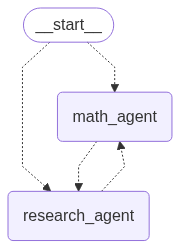

In [10]:
from langchain_openai import ChatOpenAI
from langgraph.graph import START, END
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import create_react_agent
from langgraph_swarm import create_swarm, create_handoff_tool
from IPython.display import Image, display

import os
from dotenv import load_dotenv

load_dotenv()

# Select LLM
model = ChatOpenAI(model="gpt-4o")

# Define tool
def add(a: float, b: float) -> float:
    """Add two numbers."""
    return a + b

def multiply(a: float, b: float):
    """Multiply two numbers."""
    return a * b

def divide(a: float, b: float):
    """Divide two numbers."""
    return a / b

# Handoff tools for swarm pattern - using proper LangGraph swarm handoff tool
handoff_to_research_agent = create_handoff_tool(
    agent_name="research_agent",
    description="Transfer control to the research agent for research-related tasks, web search and information gathering."
)

handoff_to_math_agent = create_handoff_tool(
    agent_name="math_agent",
    description="Transfer control the the math agent for methematical calculations and computational tasks."
)

web_search = TavilySearchResults(max_results=3)

# Create Worker Agents
research_agent = create_react_agent(
    model=model,
    tools=[web_search, handoff_to_math_agent],
    name="research_agent",
    prompt=(
        "You are a research agent specialized in web research and information gathering.\n\n"
        "INSTRUCTIONS:\n"
        "- Handle research-related tasks, web searches, and information gathering\n"
        "- DO NOT attempt mathematical calculations - use handoff_to_math_agent() for any math tasks\n"
        "- If the user asks for mathematical calculations, immediately hand off to the math agent\n"
        "- When you complete your research tasks, provide comprehensive results\n"
        "- Use handoff_to_math_agent() when mathematical calculations are needed"
    )
)

math_agent = create_react_agent(
    model=model,
    tools=[add, multiply, divide, handoff_to_research_agent],
    name="math_agent",
    prompt=(
        "You are a math agent specialized in mathematical calculations and computations.\n\n"
        "INSTRUCTIONS:\n"
        "- Handle mathematical calculations, arithmetic operations, and numerical analysis\n"
        "- DO NOT attempt web searches or research - use handoff_to_research_agent() for research tasks\n"
        "- If the user asks for research or web searches, immediately hand off to the research agent\n"
        "- When you complete your mathematical tasks, provide clear results with explanations\n"
        "- Use handoff_to_research_agent() when research or web search is needed"
    )
)

swarm_agent = create_swarm(
    agents=[research_agent, math_agent],
    default_active_agent="math_agent",
).compile()

display(Image(swarm_agent.get_graph().draw_mermaid_png()))

In [ ]:
# To test the flow:
def test_swarm_functionality():
    """Test the swarm pattern with a specific GDP query to validate handoffs."""
    
    print(f"Query: find US and New York state GDP in 2024. what % of US GDP was New York state?")
    print("-" * 80)
    
    try:
        for chunk in swarm_agent.stream(
            {
                "messages": [
                    {
                        "role": "user",
                        "content": "find US and New York state GDP in 2024. what % of US GDP was New York state?",
                    }
                ]
            },
            subgraphs=False
        ):
            pretty_print_messages(chunk, last_message=True)
        
        print(f"Test completed successfully")
        
    except Exception as e:
        print(f"Test failed with error: {str(e)}")
    
    print("=" * 80)



# Run
if __name__ == "__main__" or True:
    test_swarm_functionality()


# 6. Running the Agents

## 6.1 Invoking Modes

Agent có thể thực thi theo hai chế độ chính:
- đồng bộ sử dụng `.invoke()` hoặc `.stream()`
  
Bên gọi (người dùng hoặc hệ thống) chờ tác nhân hoàn thành nhiệm vụ trước khi tiếp tục

- Không đồng bộ sử dụng `await .ainvoke()` hoặc `async for with .astream()`

Tác nhân được đặt yêu cầu, bắt đầu xử lý và cho phép bên gọi tiếp tục các tác vụ khác nhau mà không cần chờ phản hồi. Kết quả được gửi sau, thường thông qua cơ chế gọi lại, thông báo hoặc thăm dò

In [ ]:
# Sync invocation:
from langgraph.prebuilt import create_react_agent

agent = create_react_agent(...)
response = agent.invoke({"messages": [{"role": "user", "content": "what is the weather in sf"}]})

In [ ]:
# Async invocation:
from langgraph.prebuilt import create_react_agent

agent = create_react_agent(...)
response = await agent.ainvoke({"messages": [{"role": "user", "content": "what is the weather in sf"}]})

## 6.2 Input Format
Các tác nhân sử dụng một mô hình ngôn ngữ yêu cầu một danh sách các tin nhắn làm đầu vào. Do đó, đầu vào và đầu ra của tác nhân được lưu trữ dưới dạng danh sách các tin nhắn (messages) dưới khóa tin nhắn trong trạng thái tác nhân.

Bạn có thể cung cấp các trường bổ sung được xác định trong lược đồ trạng thái của tác nhân trực tiếp trong từ điển đầu vào. Điều này cho phép hành vi động dựa trên dữ liệu thời gian chạy hoặc kết quả đầu ra của công cụ đó.

Đầu vào của tác nhân phải là một dict có khóa messages. Dưới đây là các định dạng được hỗ trợ:

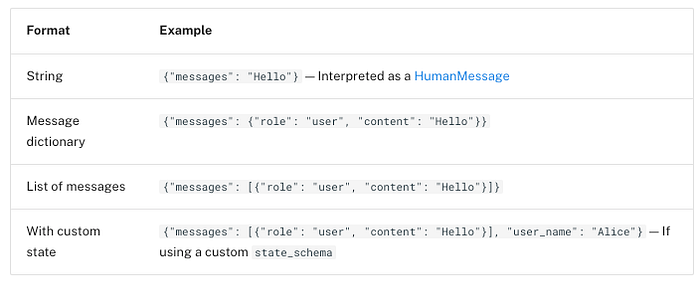

Note: chuỗi đầu vào cho tin nhắn được chuyển đổi thành HumanMessage. Hành vi này khác với tham số promt trong create_react_agent, được diễn giải là SystemMessage khi được truyền dưới dạng chuỗi.

## 6.3 Output Format
Đầu ra của tác nhân là một từ điển chứa messages (danh sách tất cả các tin nhắn được trao đổi trong suốt quá trình thực thi. e.g. đầu vào của người dùng, phản hổi của trợ lý, lệnh gọi công cụ)

Tùy chọn, structured_repsonse nếu đầu ra có cấu trúc được cấu hình. Nếu sử dụng state_schema tùy chỉnh, các khóa bổ sung tương ứng với các trường bạn đã xác định cũng có thể chứa các giá rị trạng thái được cập nhật từ quá trình thự thi công cụ hoặc logic nhắc nhở

## 6.4 Streaming Output
Các tác nhân hỗ trợ phản hồi trực tuyến cho các ứng dụng phản hồi nhanh hơn:
- cập nhật tiến độ sau mỗi bước
- Mã thông báo LLM khi được tạo
- Thông báo công cụ tùy chỉnh trong quá trình thực thi 

Truyền phát có sẵn ở cả chế độ đồng bộ và không đồng bộ

In [ ]:
# Sync streaming
for chunk in agent.stream(
    {"messages": [{"role": "user", "content": "what is the weather in sf"}]},
    stream_mode="updates"
):
    print(chunk)

In [ ]:
# Async Streaming:
async for chunk in agent.astream(
    {"messages": [{"role": "user", "content": "what is the weather in sf"}]},
    stream_mode="updates"
):
    print(chunk)

## 6.5 Max Iterations
xác định số bước tối đa mà tác nhân có thể thực hiện trước khi phát sinh lỗi. Chung có thể xác định giá trị này trong thời gian chạy hoặc trong khi xác định tác nhân thông qua `.with_config()`


In [ ]:
from langgraph.errors import GraphRecursionError
from langgraph.prebuilt import create_react_agent

def get_weather():
    pass

max_iterations = 3
recursion_limit = 2 * max_iterations + 1
agent = create_react_agent(
    model="anthropic:claude-3-5-haiku-latest",
    tools=[get_weather]
)

try:
    response = agent.invoke(
        {"messages": [{"role": "user", "content": "what's the weather in sf"}]},
        {"recursion_limit": recursion_limit},
    )
except GraphRecursionError:
    print("Agent stopped due to max iterations.")

`.with_config()`

In [ ]:
from langgraph.errors import GraphRecursionError
from langgraph.prebuilt import create_react_agent

max_iterations = 3
recursion_limit = 2 * max_iterations + 1
agent = create_react_agent(
    model="gpt-4o-mini",
    tools=[get_weather],
)
agent_with_recursion_limit = agent.with_config(recursion_limit=recursion_limit)

try:
    response = agent_with_recursion_limit.invoke(
        {"messages": [{"role": "user", "content": "what's the weather in sf"}]},
    )
except GraphRecursionError:
    print("Agent stopped due to max iterations.")

# 7. The Hidden Barriers
Những rào cản ẩn giấu

Đối với những thách thức trong việc điều phối nhiều tác nhân, những điều sau đây cần đáng được lưu ý hàng đầu:

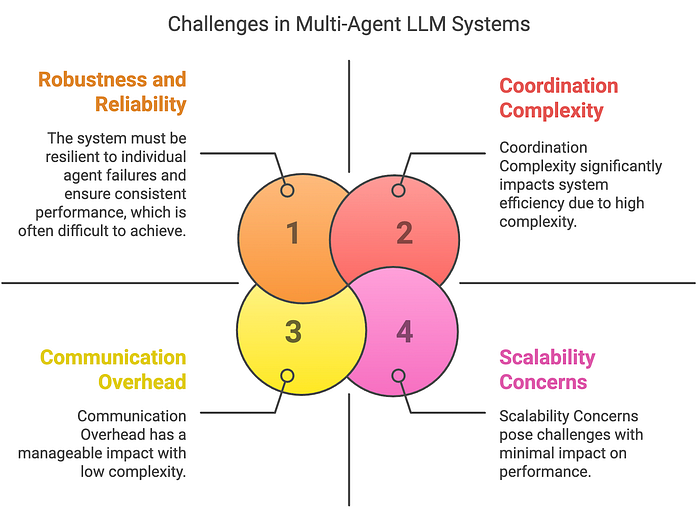

Các nhà nghiên cứu đã xem xét năm khuôn khổ MAS phổ biến trên hơn 150 nhiệm vụ, với những hiểu biết sâu sắc từ sáu chuyên gia chú thích. Và xác định được 14 chế độ lỗi riêng biệt, được nhóm thành 3 loại chính:
1. Specification and System Design Failures (lỗi hệ thống thiết kế và đặc tả): Các vấn đề phát sinh từ định nghĩa nhiệm vụ không rõ ràng hoặc kiến trúc hệ thống được thiết kế kém
2. Inter-Agent Misalignment (sự không thống nhất giữa các tác nhân): Các vấn đề phát sinh do giao tiếp sai hoặc thiếu sự phối hợp giữa các tác nhân
3. Task Verification and Termination (Xác minh và chấm dứt nhiệm vụ): Lỗi liên quan đến quy trình xác minh không đầy đủ và giao thức hoàn thành nhiệm vụ không phù hợp

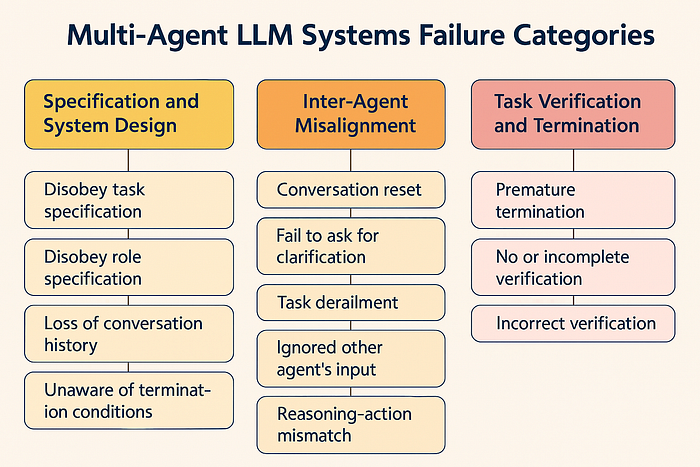

# 8. Breaking Through Barriers
Vượt qua rào cản

Để vượt qua những thách thức trên, các tác giả đã khám phá ra hai biện pháp can thiệp chính:
- Improved Specification of Agent Roles (Cải thiện đảc tả vai trò của tác nhân): Nâng cao tính rõ ràng và chính xác của vai trò tác nhân để tránh hiểu lầm và chồng chéo
- Enhanced Orchestration Strategies (Chiến lược phối hợp nâng cao): Phát triển cơ chế phối hợp tốt hơn giữa các tác nhân để hợp lý hóa tương tác và thực hiện nhiệm vụ

1. Anthropic đã công bố Giao thức Bối cảnh Mô hình (MCP), nỗ lực đầu tiên hướng đến một tiêu chuẩn công nghiệp về cách các hệ thống và quy trình AI tích hợp với nhau.
2. Giao thức Agent2Agent (A2A) của Google, ra mắt vào ngày 9 tháng 4 năm 2025, cho phép các tác nhân AI giao tiếp và cộng tác trên nhiều nền tảng khác nhau bằng cách sử dụng "Thẻ Tác nhân" (Agent Cards) dựa trên JSON, mô tả khả năng, dữ liệu đầu vào và cơ chế xác thực của chúng.
3. A2A và MCP bổ sung cho nhau: trong khi A2A tạo điều kiện cho khả năng tương tác giữa các tác nhân (tích hợp ngang), MCP cung cấp cho các tác nhân quyền truy cập công cụ (tích hợp dọc).

# 9. Roadmap For Building Scalable AI Agents

Khái niệm cốt lõi phân biệt hệ thống nguyên khối với hệ thống tác nhân là khả năng suy luận và sử dụng công cụ một cách hợp lý. Nhưng việc xây dựng các hệ thống này có thể rất khó khăn nếu không có lộ trình phù hợp.

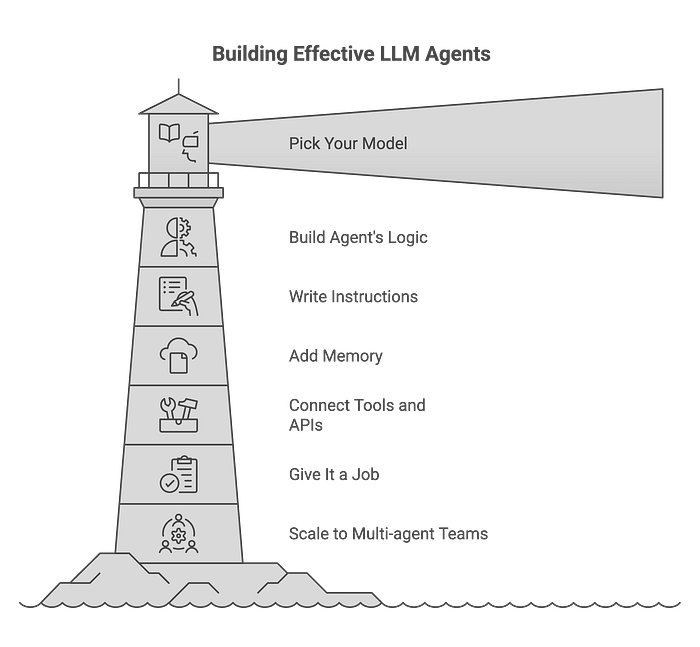

1. Select Your Model
   - Nổi bật về lập luận và xử lý logic
   - Hỗ trợ tư duy từng bước (CoT)
   - Cung cấp đầu ra ổn định và nhất quán
2. Design the Agent's Reasoning Process
   - Xác định cách tác nhân tiếp cận nhiệm vụ.
   - Liệu có nên dừng lại và suy nghĩa trước khi trả lời không?
   - Liệu có nên lập kế hoạch hành động từng bước hay ngay lập tức
   - Liệu có nên sử dụng các công cụ khi cần thêm trợ giúp không
    - Tip: bắt đầu với chiến lược đơn giản như khung ReAct hoặc plan-then-execute
3. Establish Operating Guidelines
    - Đặt ra các quy tắc tương tác rõ ràng
    - Xác định hành vi và giọng điệu phản hồi
    - Chỉ định thời điểm sử dụng các công cụ bên ngoài
    - Chuẩn hóa các định dạng phản hồi (JSON, markdown)
    - Tip: Hãy coi đây là giao thức hoạt động nội bộ của tác nhân
4. Incorporate Memory
   - Bù đắp cho sự thiếu hụt bộ nhớ dài hạn của LLM bằng cách:
   - Áp dụng bộ nhớ cửa sổ trượt cho ngữ cảnh gần đây
   - Tóm tắt các cuộc trò chuyện trong quá khứ
   - Lưu trữ thông tin quan trọng (sở thích, quyết định của người dùng)
   - Tip: Các công cụ như MemGPT hoặc ZepAI có thể đơn giản hóa việc quản lý bộ nhớ
5. Integrate Tools and APIs
    - Cho phép tác nhân cấp thấp thực hiện các hành động thực tế:
    - Truy xuất dữ liệu bên ngoài
    - cập nhật CRM và có sở dữ liệu
    - Thực hiện tính toán hoặc chuyển đổi 
    - Tip: sử dụng MCP để tích hợp liền mạch các công cụ vào quy trình làm việc
6. Assign a Clear Objective
    - Giao nhiệm vụ cụ thể cho tác nhân cấp thấp (nhân viên)
    - Tip: Tập trung vào việc thu hẹp phạm vi công việc sẽ hiệu quả hơn nếu xác định những gì tác nhân ko nen làm thay vì để hướng dẫn mở
7. Scale into Multi-Agent Teams
   - Tạo tác nhân chuyên biệt có khả năng cộng tác, ví dụ:
   - Một tác nhân có khả năng thu thập thông tin
   - Một tác nhân khác diễn giải dữ liệu
   - Một tác nhân thứ ba định dạng và trình bày kết quả
   - Tip: Chuyên môn hóa rõ ràng sẽ tạo ra hệ thống đa tác nhân hiệu quả

# 10. Conclusion

- Lựa chọn mô hình AI agent: đơn giản và nhanh hay phức tạp và mạnh mẽ?
- Cân nhắc áp dụng supervisor pattern hoặc swarm pattern để tối ưu hiệu suất
- xác lại các chế độ gọi (invocation modes) và định dạng đã học, đặc biệt là khả năng xử lý bất đồng bộ để mở rộng tiềm năng
- nhận diện các rào cản trong thiết kế và triển khai trước khi bắt đầu
- Tùy chỉnh handoff tools và điều chỉnh số lượng vòng lặp/iteration để đạt kết quả tốt nhất
- thử nghiệm các chiến lược orchestration đến streaming để nâng cao thích ứng và sức mạnh của agent
- bắt đầu hành trình xây dựng giải pháp AI agent scalable và chia sẻ bước tiếp theo của bạn